# __Quicken Loans - Case Study__
***

## __Vamsi Chand Emani__

In [ ]:
#Changing the theme from default
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('grade3')

In [ ]:
#Creating a button to toggle on/off the raw code
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Problem Statement
***

## Introduction:

 - A European banking instituition launched a direct marketing campaign based on phone calls from May 2008 to November 2010
 - Often, more than one contact to the same client was required, to promote the clients to subscribe for the term deposit.
 - Information about a predictive model currently used by the bank was also included

## Objective:

- To build a scalable, reusable & dynamic input data product to evaluate the present marketing campaign & build a new model(if applicable)

# Approach
***

- The steps involved in our analysis are (click on the hyper links for the respective sections):<br>
    1. [Data Wrangling](#Data-Wrangling)
    3. [Data Quality Check & Cleaning](#Data-Quality-Check-&-Cleaning)
    4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    6. [Model Evaluation](#Model-Evaluation)
    5. [Predictive Modeling](#Predictive-Modeling)
    6. [Future Scope](#Future-Scope)

 - Campaign Data is imported & cleaned for analysis.
 - Exploratory Data Analysis is performed to arrive at conclusions on the data.
 - Evaluation metrics for the current model are calculated & New modeling techniques are developed for the marketing campaign.

# Assumptions
***

- Several assumptions were made during this analysis. They are:<br>
    - Often, Threshold for the models are assumed to look at the evaluation metrics. After the initial evaluation, best threshold is arrived at by calculating the evaluation metrics across different thresholds
    - There are no technical issues during this period & only the attributes given in the dataset are responsible for subscription
    - Seasonality is not taken into consideration, because the year of the data is not given
    - Identifying a client who is likely to subscribe is more important than doing a few more cold calls to unlikely subscribers

## Data Sources: 

- We have direct marketing campaign data with 41188 records & 20 attributes, ordered from May 2008 to November 2010.

## Data Wrangling
***

In [2]:
#Importing the basic packages required - Will be importing the other required packages as required in the respective code blocks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Setting the figure of the plots in the workbook to (18,8)
plt.rcParams["figure.figsize"] = (18,8)

In [186]:
#Importing the marketing campaign dataset
campaign_data = pd.read_csv('DSA Data Set.csv')

Let's look at the shape of dataset:

In [4]:
campaign_data.shape

(41188, 22)

As we already know, campaign data has 41188 records with 22 attributes. Let's take a look at a snippet of the data.

In [5]:
campaign_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


Output variable(y) is binary variable which describes if the client subscribed a term deposit. This attributes is of utmost importance to us.

## Data Quality Check & Cleaning

Let's look at the data types of the columns for each data set:

In [6]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

Campaign data is a combination of continous(int,float) variables & categorical(object) variables. Let's look at all the different columns.

In [189]:
campaign_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

Attributes are a combination of demographic, current campaign, last campaign & socio-economic attributes. Let's look at the basic statistics of the data.

In [8]:
#Continous variables
campaign_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [9]:
#Categorical Variables
campaign_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


__Observations:__<br>
   - 11 out of the 22 attributes are categorical.
   - Most of the existing model prediction values are very high & are close to 1 as the mean is 0.88 and median is 0.95

In [10]:
#Dropping duplicate records
campaign_data.drop_duplicates(inplace=True)

In [11]:
#Let's look at the shape of the data now
campaign_data.shape

(41176, 22)

41188 - 41176 = 12 records were duplicates & we have removed them.

Let's confirm that there's no missing data:

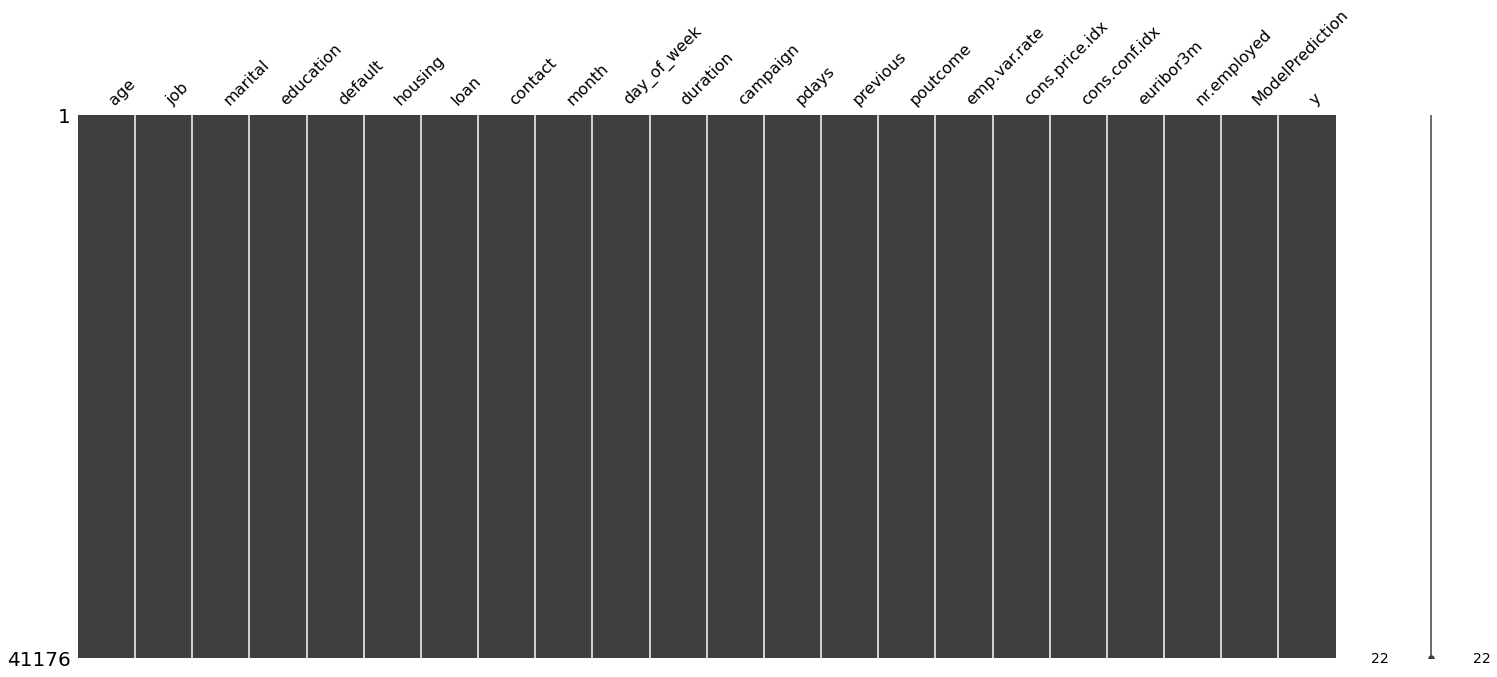

In [12]:
# Missing data indicated by Blank
import missingno as msno
msno.matrix(campaign_data);

In [27]:
#Writing a missing values function which identifies the # of missing records for every column,% of total (if any)
def missingValues(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percentage = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])
    missing_values_df=missing_values_df[missing_values_df['Missing Count']!=0].round(decimals=2)
    if missing_values_df.shape[0]==0:
        print('No Missing Data')
    else:
        return missing_values_df

In [24]:
#Calling the missing values function
missingValues(campaign_data)

No Missing Data


__Inference:__ 
   - We don't have any missing values in the campaign data provided

# Data Exploration

In [81]:
#Let's look at the number of subscribed in the data
campaign_data.y.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

__Inference:__ 
- Data is highly imbalanced with 89% unsubscribed & only 11% subscribed.

In [8]:
#Looking at the default's data
campaign_data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

__Inference:__ 
- Looking at the default column, identified that unknown is a value in the data.
- Unknown data can be a result of different reasons, we need to impute it to perform modeling

In [141]:
#Replacign all the unknown's in the data to nan to perform data imputation
campaign_data.replace(to_replace='unknown',value=np.nan,inplace=True)

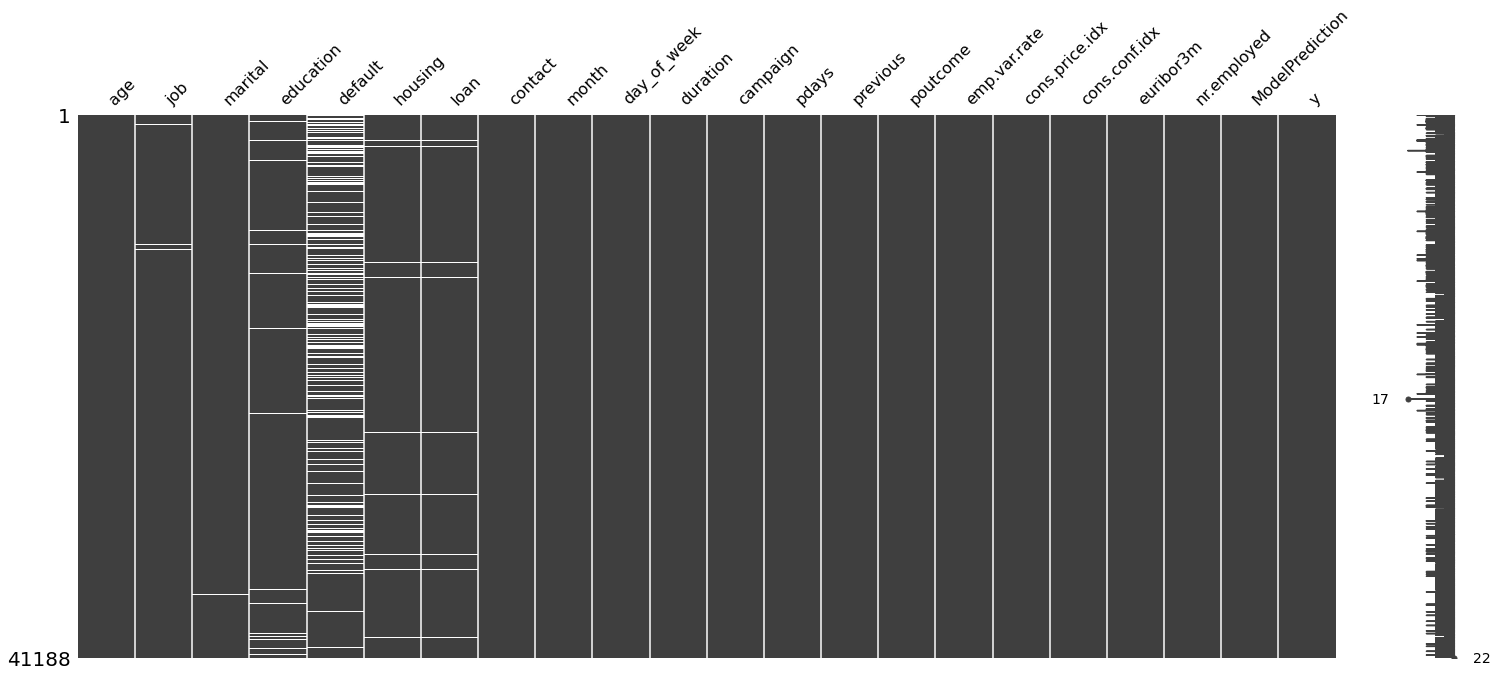

In [17]:
msno.matrix(campaign_data);

In [28]:
#Looking at the missing value counts again
missingValues(campaign_data)

,Missing Count,Missing Percentage
default,8597,20.87
education,1731,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19


__Inference:__
- Default has a very high missing rate of 21% out of all attributes
- 6 out of 22 attributes has missing data & all of them are categorical

# Data Encoding

We need to encode the categorical data to treat the missing data & build models. The most widely used techniques are:
- __Find & Replace:__ Find & Replace is a common technique used by creating a data mapping dictionary & replacing the categorical values with their respective mappings.
- __Label Encoding:__ Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.Primarily used when the categorical feature is not ordinal
- __One-Hot Encoding:__ One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. Primarily used when the categorical feature is not ordinal

3 of these 6 columns with missing data are binary, the remaining 3 are categorical with more than 2 levels & they are a combination of both ordinal and nominal features.

As we have a combination of nominal & ordinal values, we will use the Find & replace strategy.

In [142]:
campaign_data['default'].replace(to_replace={'yes':1,'no':0},inplace=True) #binary
campaign_data['education'].replace(to_replace={'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,
                                                  'high.school':4,'university.degree':5,'professional.course':6},inplace=True)#ordinal
campaign_data['housing'].replace(to_replace={'yes':1, 'no':0},inplace=True)#binary
campaign_data['loan'].replace(to_replace={'yes':1, 'no':0},inplace=True)#binary
campaign_data['job'].replace(to_replace={'unemployed':0,'student':1,'housemaid':2,'blue-collar':3,'technician':4,'services':5,
                                         'admin.':6,'self-employed':7,'management':8,'entrepreneur':9,'retired':10},inplace=True)#ordinal
campaign_data['marital'].replace(to_replace={'single':0, 'married':1, 'divorced':2},inplace=True)#nominal

As we have encoded the data, let's do the missing value imputation.

# Missing Value Imputation

Different strategies used for missing values imputation are:
- Removing rows with missing data
- Univariate feature imputation
- Multivariate feature imputation
- Ignore Missing data

Each of the above techniques have their pros & cons, but as the features have correlation between them, let's perform multivariate feature imputation using IterativeImputer

In [148]:
#Function for missing values imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
def MissingValuesImputation(missingvaluecolumns, df):
    imputer = IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='most_frequent',max_iter=10, random_state=1234)
    df[missingvaluecolumns] = imputer.fit_transform(df[missingvaluecolumns])
    return df[missingvaluecolumns]

In [149]:
#Calling function to impute the missing values
import warnings 
warnings.filterwarnings('ignore')#Ignoring warnings
missingvaluecolumns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
campaign_data[missingvaluecolumns]=MissingValuesImputation(missingvaluecolumns=missingvaluecolumns, df=campaign_data)

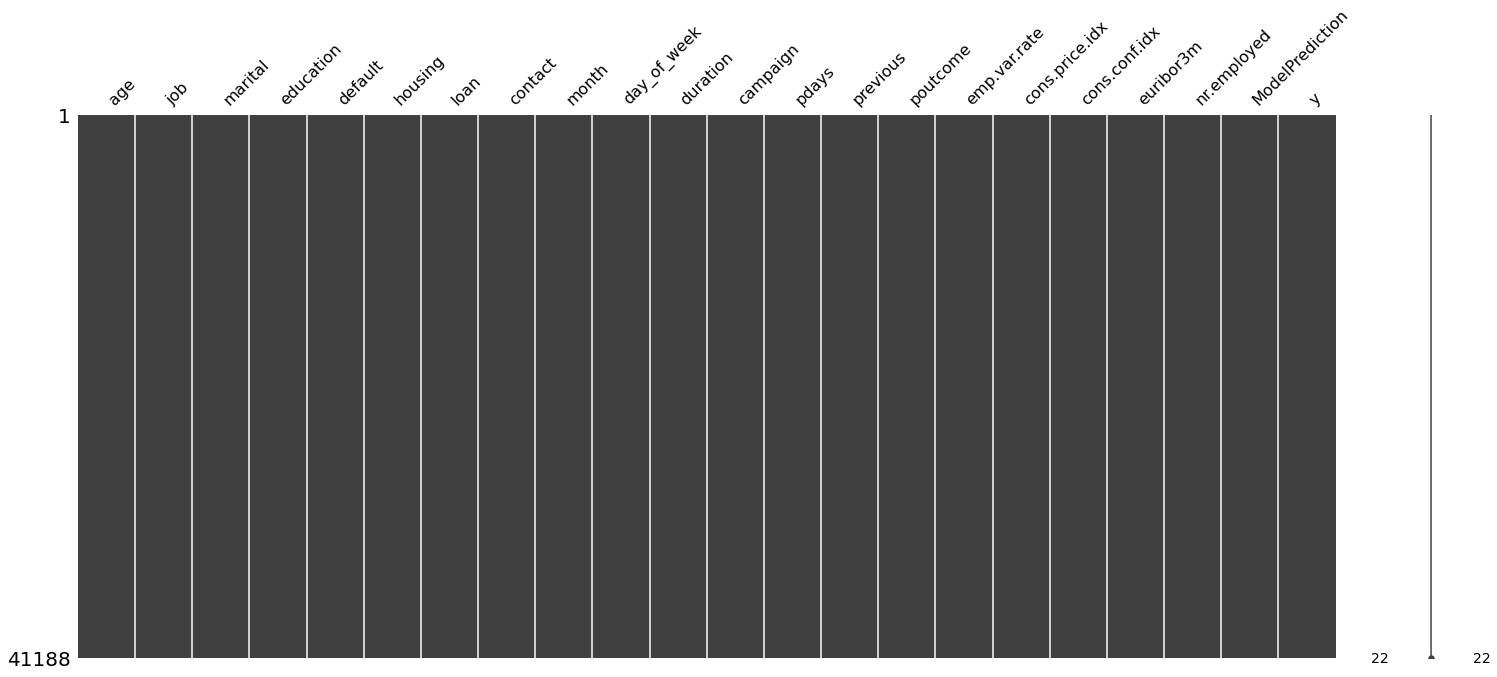

In [51]:
#Looking at the missing data again
msno.matrix(campaign_data);

In [52]:
#Calling the missing data function
missingValues(campaign_data)

No Missing Data


__Inference:__ 
- Missing data has been imputed.

In [150]:
#Decoding the categorical variables we have encoded for visualisation
campaign_data['default'].replace(to_replace={1:'yes',0:'no'},inplace=True)
campaign_data['education'].replace(to_replace={0:'illiterate',1:'basic.4y',2:'basic.6y',3:'basic.9y',
                                                  4:'high.school',5:'university.degree',6:'professional.course'},inplace=True)
campaign_data['housing'].replace(to_replace={1:'yes',0:'no'},inplace=True)
campaign_data['loan'].replace(to_replace={1:'yes',0:'no'},inplace=True)
campaign_data['job'].replace(to_replace={0:'unemployed',1:'student',2:'housemaid',3:'blue-collar',4:'technician',5:'services',
                                         6:'admin.',7:'self-employed',8:'management',9:'entrepreneur',10:'retired'},inplace=True)
campaign_data['marital'].replace(to_replace={0:'single',1:'married',2:'divorced'},inplace=True)

In [56]:
#Let's take a look at the data again
campaign_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


# Exploratory Data Analysis

Exporting the data to Power BI for data exploration. Performed Both Univariate & Bivariate analysis of the data.

In [57]:
#Exporting data to csv
campaign_data.to_csv('Campaign Data.csv')

EDA was done separately for categorical & continous variables. Attaching the Power BI visualisations for reference.

In [216]:
#Embeddding interactive, live Power BI dashboard for Exploratory Data Analysis
from IPython.display import IFrame

powerBiEmbed = 'https://app.powerbi.com/reportEmbed?reportId=b8ca86d1-db05-4b87-abbd-be59f12e62cf&autoAuth=true&ctid=8a4925a9-fd8e-4866-b31c-f719fb05dce6&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXVzLWVhc3QyLXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9'

IFrame(powerBiEmbed, width=950, height=550)

## Categorical Features

### Job

Type of job - Categorical with 11 attributes('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed')

__Inference:__ Clients who are admins have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This explains that most of our customers are working as admin.

### Marital

Marital status - Categorical with 3 attribues('divorced','married','single'. note: 'divorced' means divorced or widowed)

__Inference:__ Majority of the customers are married. Followed by Single, divorced and unknown.

### Default

Has credit in default? (categorical: 'no','yes')

### Housing

has housing loan? (categorical: 'no','yes','unknown')

__Inference:__ Majority of our customers have a housing loan

### poutcome

outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

__Inference:__
- For most of the customers, the previous marketing campaign outcome does not exists. It means that most of the customers are new customers who have not been contacted earlier.
- customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit.
- This variable will be important for predicting the target variable

### day_of_week

last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

__Inference:__
- The day of the week seems to be irrelevent as we have the same amount of data for all the days of the week, and subscription ratio is also almost same.

## Numerical Attributes

### Age

__Inference:__ Both subscibed or didn’t subscribe a term deposit, has a mean & median age of around 40

### Duration

This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

__Inference:__
- As we only know the duration after the end of the call, we also know the target variable by then. Both are expected to have a very high correlation.
- This can be explained from the difference of almost 330 secs(5.5 mins) between the averages durations of those who subscribed to who haven't subscribed

### emp.var.rate

employment variation rate - quarterly indicator (numeric)

### euribor3m

basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.

__Inference:__
- As interest rate is a key factor for subscription, it is assumed to have highly correlation with target variable. We will find more about the impact in the modeling.

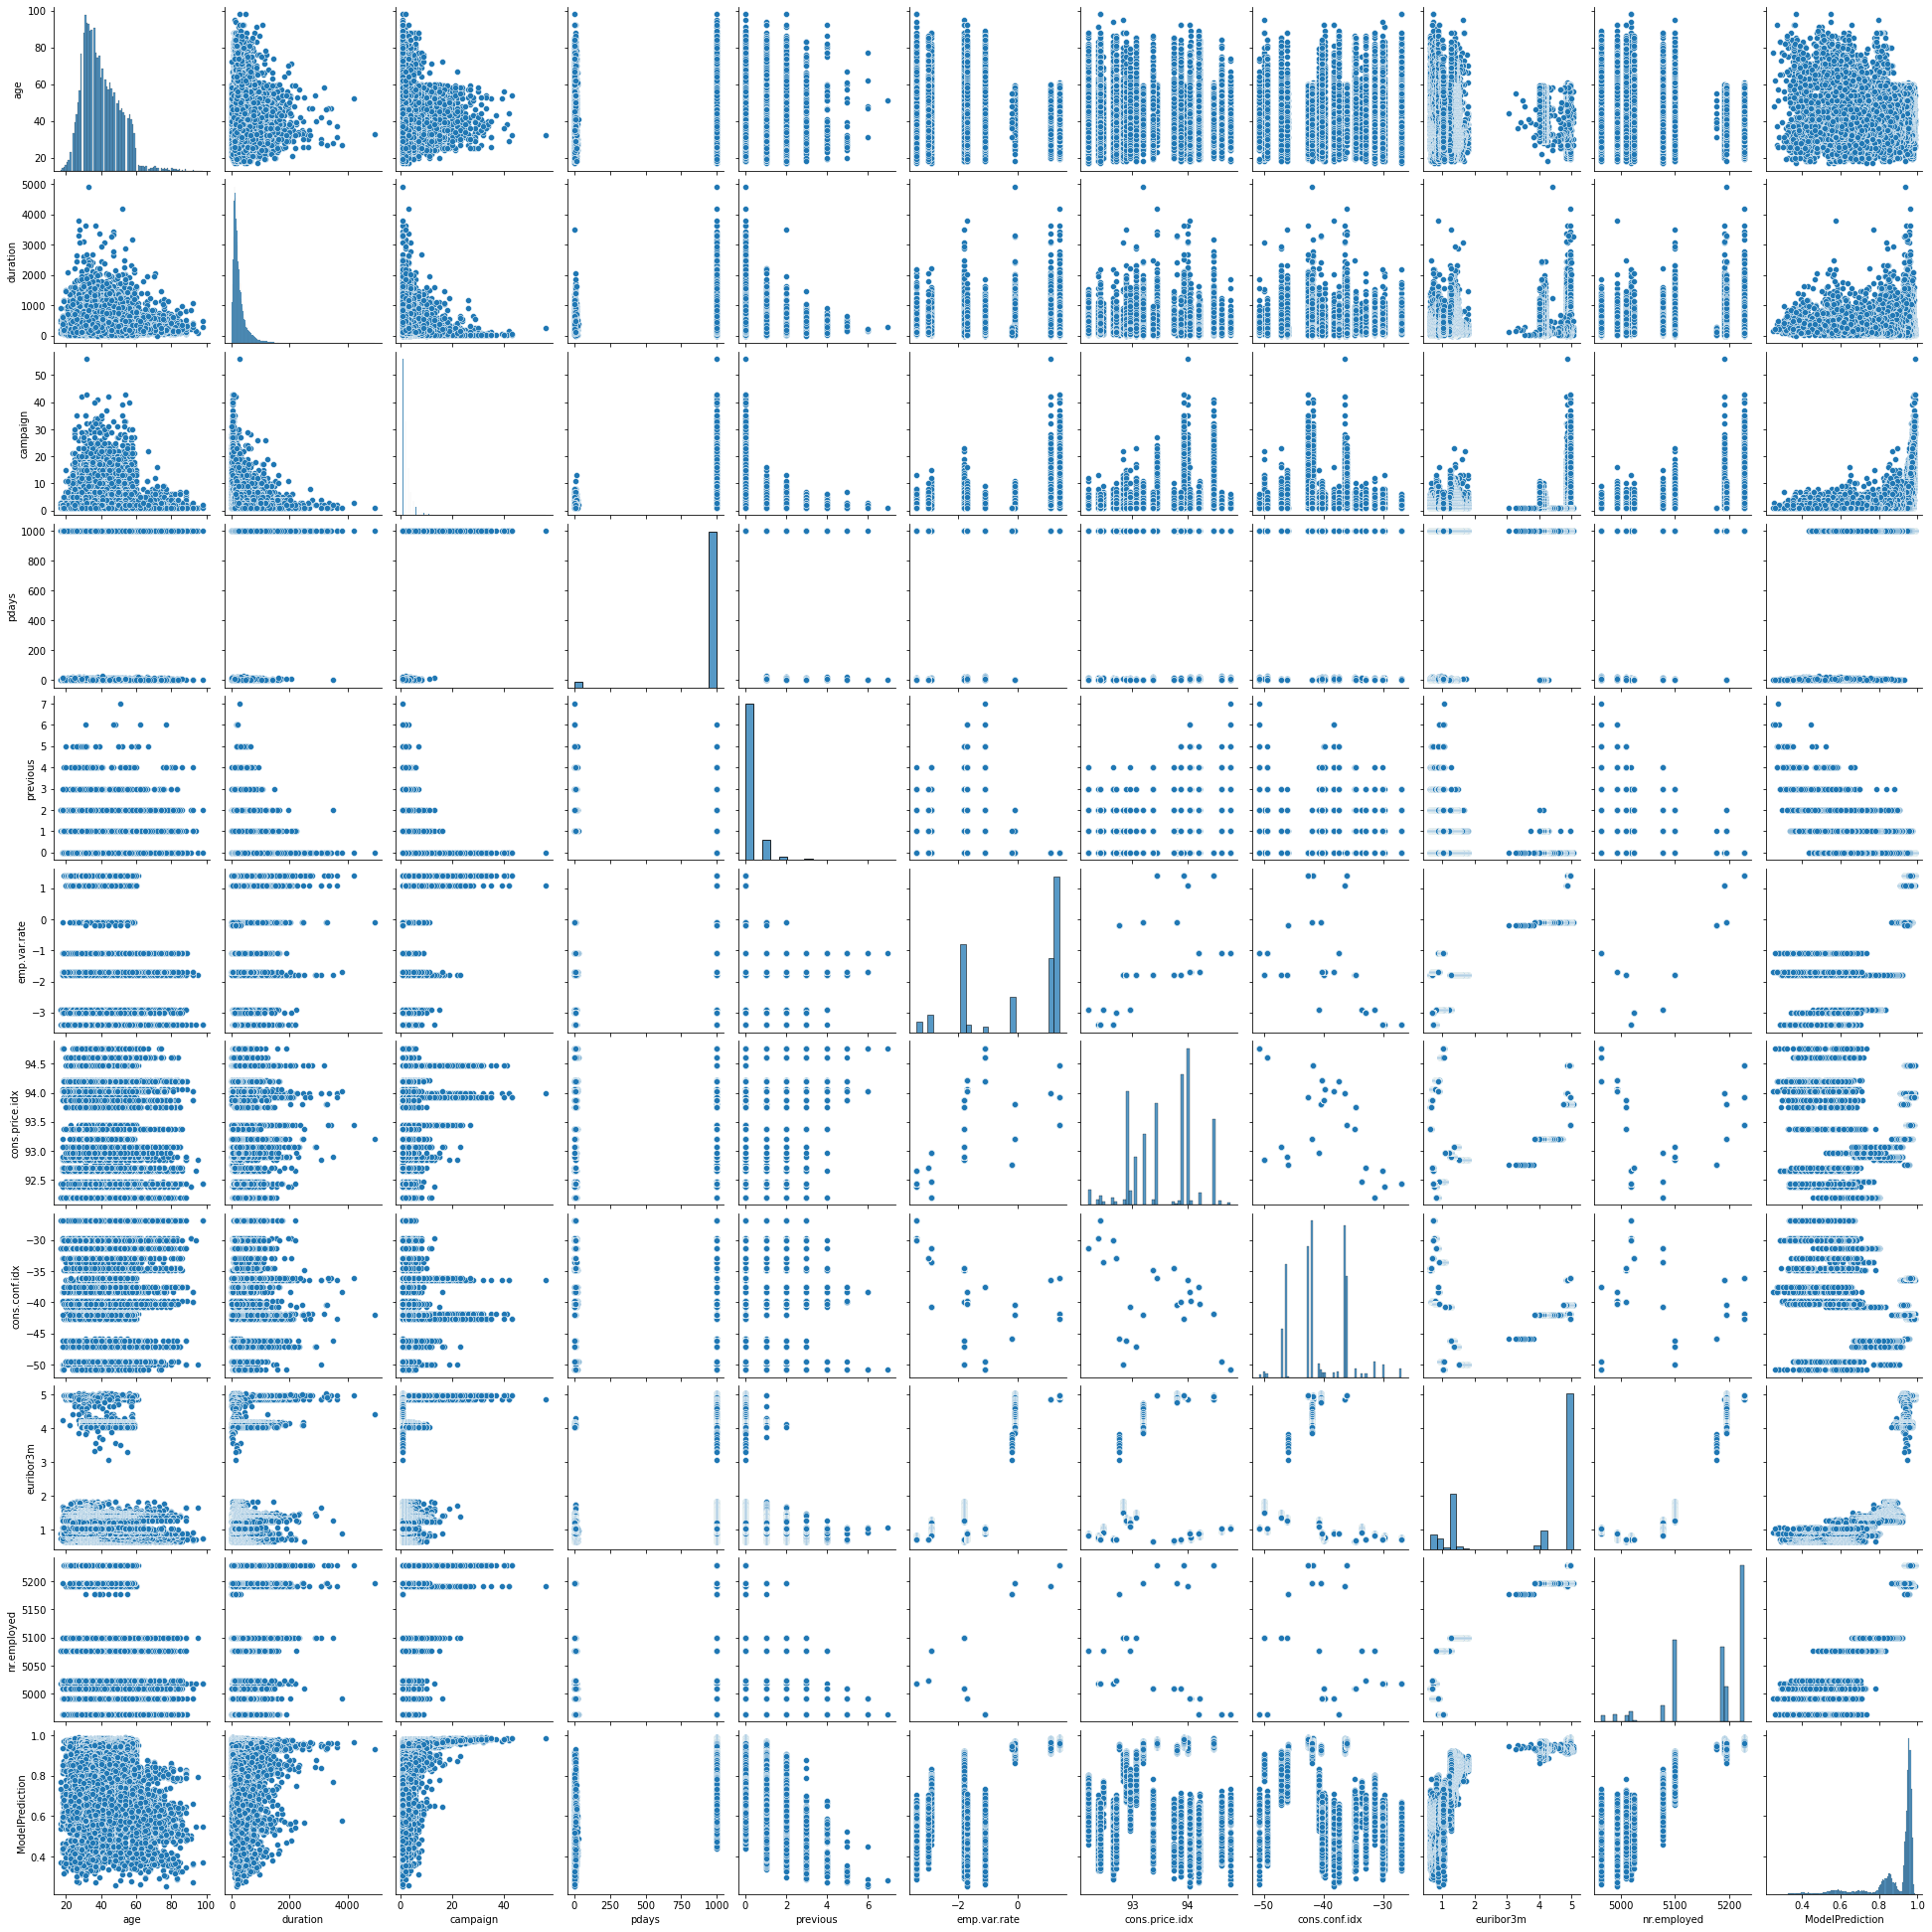

In [58]:
#Looking at the pairplot of the data to identify bi-variate trends
sns.pairplot(campaign_data);

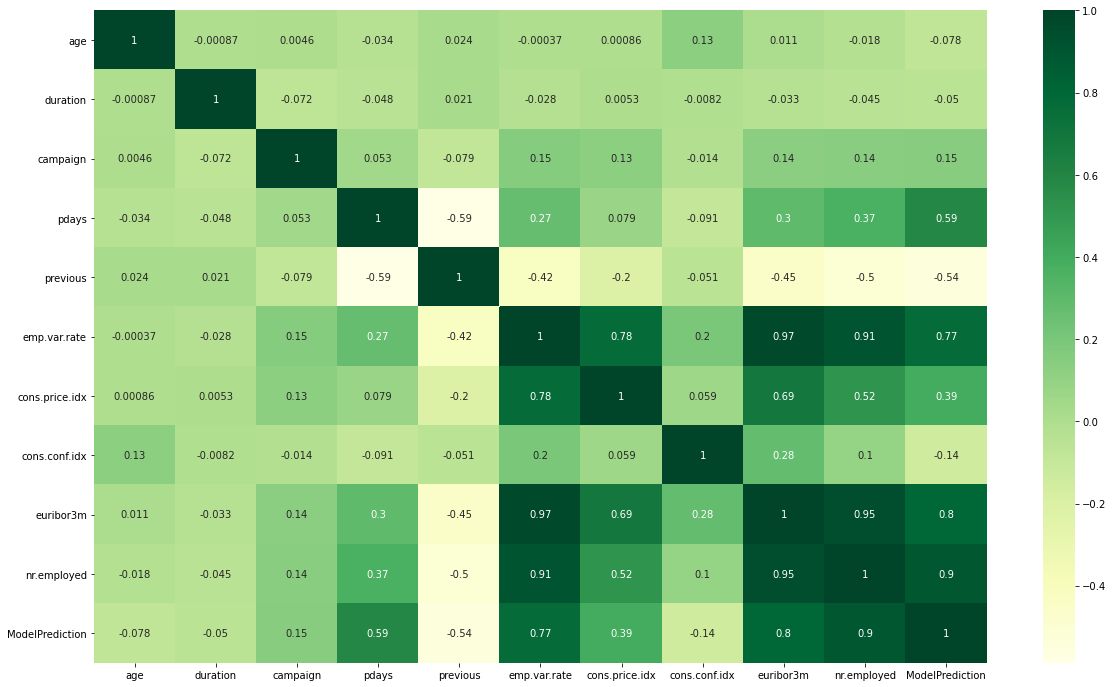

In [187]:
#Correlation Matrix - Let's look at the correlations between the variables
plt.subplots(figsize=(20,12))
sns.heatmap(campaign_data.corr(),annot=True,cmap="YlGn");

__Inference:__
- nr.employed and euribor3m have a correlation value of 0.95, whereas euribor3m and emp.var.rate have a correlation of 0.97, which is very high compared to the other features.

Now that we did the basic exploration of the data, let's evaluate the current model

# Model Evaluation

The current model is a classification model as the output variable y is binary. For evaluating classification models, key metrics used are:<br>
   1. Accuracy<br>
   2. Sensitivity, Specificity<br>
   3. Precision, Recall<br>
   4. F-Measure<br>
   5. ROC - Area under the curve(AUC)<br>
   6. PR - Area under the curve(AUC)<br>

Let's look at these metrics in detail & identify which metric will be useful for our classification problem.

1. __Accuracy__ - Correct Predictions / Total Predictions
- classification accuracy is almost universally inappropriate for imbalanced classification. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class.

2. __Sensitivity/Recall__ - TruePositive / (TruePositive + FalseNegative)
- Sensitivity refers to the true positive rate and summarizes how well the positive class was predicted.

3. __Specificity__ - TrueNegative / (FalsePositive + TrueNegative)
- Specificity is the complement to sensitivity, or the true negative rate, and summarises how well the negative class was predicted.

4. __Precision__ = TruePositive / (TruePositive + FalsePositive)
- Precision summarizes the fraction of examples assigned the positive class that belong to the positive class.

5. __F-beta Measure__ = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
- Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure. The balance of precision and recall is controlled by a coeffiecient, beta

6. __ROC - Area under the curve(AUC)__ - A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.
- This can be optimistic under a severe class imbalance, especially when the number of examples in the minority class is small.

7. __Precision Recall Curve - Area under the curve(AUC)__ - different thresholds are used on a set of predictions by a model, and in this case, the precision and recall are plotted. Area under the curve is calculated.
- Focuses on the performance of the classifier on the minority class.

__Inference:__
- From the above analysis, it is clear that accuracy, specificity are not useful for our evaluation.
- Sensitivity/Recall, Precision, F-beta Measure will be useful for our evaluation but they are dependant on threshold of prediction.
- AUC-ROC & PR-ROC are the most important evaluation metrics for our models.
- __PR-ROC__ beats AUC-ROC becuase of the reason that we are more interested in finding all the persons who can potentially subscribe at the expense of doing the marketing to few people who may not end up subscribing(lower marketing cost compared to higher CLTV value if subscribed.)

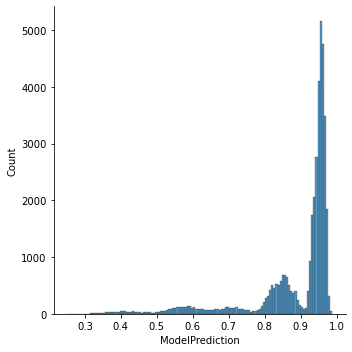

In [84]:
#Let's look at the distribution of the Model prediction values for identifying threshold
sns.displot(campaign_data.ModelPrediction);

__Inference:__
- Most of the predicted values from  the existing model are greater than 0.9. So let's find the accuracy for a range of thresholds from 0.9 to 1

In [151]:
#Encoding the value of y from yes/no to 1/0
campaign_data['y'].replace(to_replace={'yes':1, 'no':0},inplace=True)

Let's look at all the evaluation metrics discussed above once:

## Accuracy

In [20]:
#Calculating accuracy scores for different values of threshold from 0.9 to 1
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score,fbeta_score
for threshold in [x / 100.0 for x in range(90, 101, 1)]:
    actualValues = campaign_data.y
    predictedValues = campaign_data['ModelPrediction'].gt(threshold).astype(int)
    accuracy = accuracy_score(predictedValues, actualValues)
    print('Accuracy score for threshold '+ str(threshold) +' is :', round(accuracy,2))

Accuracy score for threshold 0.9 is : 0.27
Accuracy score for threshold 0.91 is : 0.28
Accuracy score for threshold 0.92 is : 0.28
Accuracy score for threshold 0.93 is : 0.31
Accuracy score for threshold 0.94 is : 0.38
Accuracy score for threshold 0.95 is : 0.49
Accuracy score for threshold 0.96 is : 0.68
Accuracy score for threshold 0.97 is : 0.83
Accuracy score for threshold 0.98 is : 0.88
Accuracy score for threshold 0.99 is : 0.89
Accuracy score for threshold 1.0 is : 0.89


__Inference:__
- As we can see, with increasing threshold, we are assigning every record as unsubscribed & we are getting a very high accuracy because of the imbalance of the data.
- Not useful for us as we have highly imbalanced data set.

## Precision, Recall, F-score, Confusion Matrix

In [23]:
#Assuming threshold=0.97
predictedValues = campaign_data['ModelPrediction'].gt(0.97).astype(int)
print('Recall: '+ str(recall_score(campaign_data.y, predictedValues)))
print('Precision: '+ str(precision_score(campaign_data.y, predictedValues)))
print('F1 score: '+ str(f1_score(campaign_data.y, predictedValues)))
print('F2 score: ' + str(fbeta_score(campaign_data.y, predictedValues, average='macro', beta=2)))
print('\n clasification report:\n '+ str(classification_report(campaign_data.y, predictedValues)))
print('\n confussion matrix:\n '+ str(confusion_matrix(campaign_data.y, predictedValues)))

Recall: 0.028663793103448274
Precision: 0.05117352828010773
F1 score: 0.03674540682414698
F2 score: 0.47682777939424936

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     36548
           1       0.05      0.03      0.04      4640

    accuracy                           0.83     41188
   macro avg       0.47      0.48      0.47     41188
weighted avg       0.79      0.83      0.81     41188


 confussion matrix:
 [[34082  2466]
 [ 4507   133]]


In [24]:
#Assuming threshold=0.98
predictedValues = campaign_data['ModelPrediction'].gt(0.98).astype(int)
print('Recall: '+ str(recall_score(campaign_data.y, predictedValues)))
print('Precision: '+ str(precision_score(campaign_data.y, predictedValues)))
print('F1 score: '+ str(f1_score(campaign_data.y, predictedValues)))
print('F2 score: ' + str(fbeta_score(campaign_data.y, predictedValues, average='macro', beta=2)))
print('\n clasification report:\n '+ str(classification_report(campaign_data.y, predictedValues)))
print('\n confussion matrix:\n '+ str(confusion_matrix(campaign_data.y, predictedValues)))

Recall: 0.00021551724137931034
Precision: 0.01
F1 score: 0.0004219409282700422
F2 score: 0.4866915372915725

 clasification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     36548
           1       0.01      0.00      0.00      4640

    accuracy                           0.88     41188
   macro avg       0.45      0.50      0.47     41188
weighted avg       0.79      0.88      0.83     41188


 confussion matrix:
 [[36449    99]
 [ 4639     1]]


__Inference:__
- As we can see from above, threshold highly effects the performance of the metrics, Precision, Recall, F-score, Confusion Matrix. To measure the performance of the model without having threshold, other metrics like ROC-AUC & PR-AUC will be more useful.

## Confusion Matrix

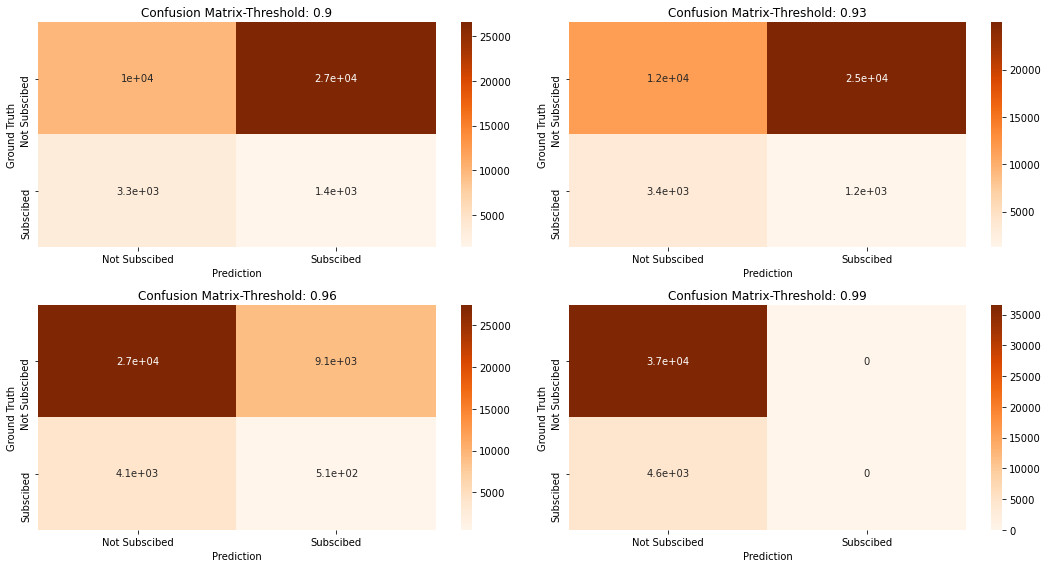

In [50]:
#Deriving the confusion matrix for different threshold values
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
for a,ax in zip(range(90, 101, 3),axes.flatten()):
    predictedValues = campaign_data['ModelPrediction'].gt(a/100).astype(int)
    sns.heatmap(confusion_matrix(campaign_data.y,predictedValues), annot=True,ax=ax,cmap='Oranges')
    ax.set_title('Confusion Matrix-Threshold: ' + str(a/100))
    ax.set_xlabel('Prediction');ax.set_ylabel('Ground Truth');
    ax.xaxis.set_ticklabels(['Not Subscibed', 'Subscibed']); ax.yaxis.set_ticklabels(['Not Subscibed', 'Subscibed']);
plt.tight_layout()  
plt.show()

__Inference:__
- As the threshold value is increasing, the model predicts less number of records as 'subscribed', as a result recall decreases which is bad result for us.

## ROC - AUC Curve

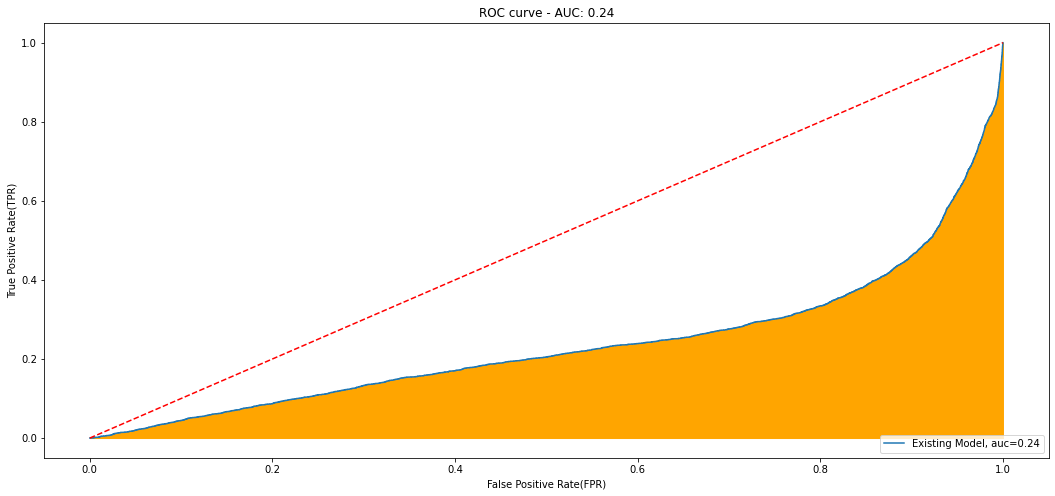

In [56]:
# Drawing ROC Curve & calculating Area under the curve(AUC)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(campaign_data.y,campaign_data.ModelPrediction)
auc = metrics.roc_auc_score(campaign_data.y,campaign_data.ModelPrediction)
plt.plot(fpr,tpr,label="Existing Model, auc="+str(round(auc,2)));
plt.plot([0, 1], [0, 1],'r--')
plt.fill_between(fpr, tpr,color='Orange')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve - AUC: '+str(round(auc,2)))
plt.legend(loc=4);

__Inference:__
- AUC for ROC curve for the existing model is __0.24__. AUC-ROC is more globally in that it is irritated by false positives relative to how many you could have drawn from the whole dataset. 

## ROC vs Precision - Recall

__Imbalanced Data Example:__
- Consider a detector with TP=9, FN=1, TN=90, FP=90, where there are 10 positive and 990 negative sample. TPR=0.9, FPR=0.5 which indicates a __good ROC score__, however Precision=0.1,Recall=0.9 which indicates a __bad PR score__.

## Precision - Recall

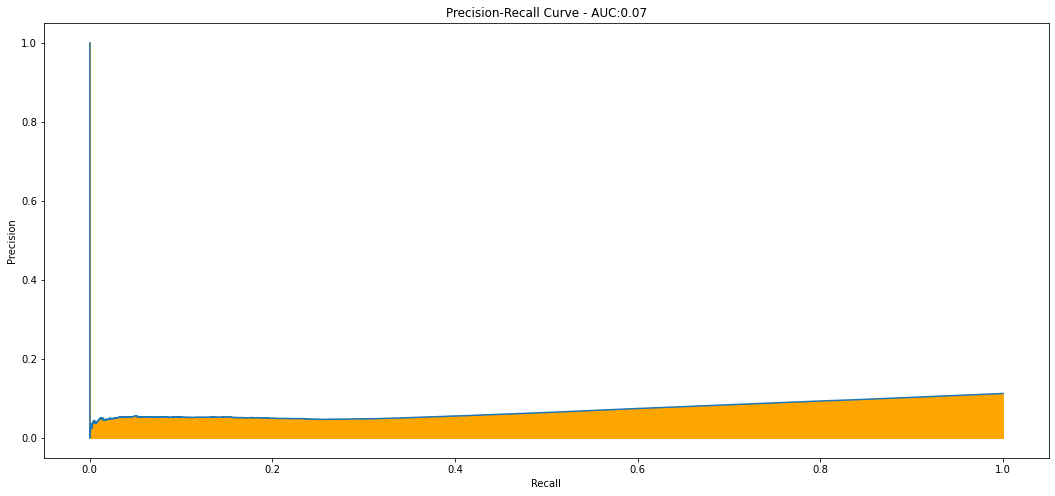

In [59]:
#Drawing Precision-Recall curve & finding AUC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(campaign_data.y,campaign_data.ModelPrediction)
auc_score = metrics.auc(recall, precision)
plt.plot(recall, precision)
plt.fill_between(recall, precision,color='Orange')
plt.title('Precision-Recall Curve - AUC:'+ str(round(auc_score,2)))
plt.xlabel('Recall')
plt.ylabel('Precision');

__Inference:__
- PR-AUC for the existing model is __0.07__ which is very low, suggesting a bad existing model. So, let's build a model which can predict the subscribers better.

# Predictive Modeling

As we have a highly imbalanced data, we need to __balance the data__ for training our models. Common sampling techniques are:
- __Over Sampling Techniques__
    - __Random Oversampling:__
        - The simplest oversampling method involves randomly duplicating examples from the minority class in the training dataset
    - __Synthetic Minority Oversampling Technique (SMOTE):__
        - SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.
    - __Adaptive Synthetic Sampling (ADASYN)__
        - Extension to SMOTE that generates synthetic samples inversely proportional to the density of the examples in the minority class. It is designed to create synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.
- __Under Sampling Techniques__
    - __Random Undersampling:__
        - The simplest undersampling method involves randomly deleting examples from the majority class in the training dataset, referred to as random undersampling.
    - __Condensed Nearest Neighbors:__
        - It works by enumerating the examples in the dataset and adding them to the store only if they cannot be classified correctly by the current contents of the store, and can be applied to reduce the number of examples in the majority class after all examples in the minority class have been added to the store.
    - __Tomek Links:__
        - Extension to the Condensed Nearest Neighbors rule. A Tomek Link refers to a pair of examples in the training dataset that are both nearest neighbors (have the minimum distance in feature space) and belong to different classes.


Both Undersampling & Oversampling techniques have their pros and cons. Let's do both of them & evaluate their performances.

Some Rules of Thumb for sampling from internet:
- Consider testing under-sampling when you have an a lot data
- Consider testing over-sampling when you don’t have a lot of data
- Consider testing random and non-random (e.g. stratified) sampling schemes.
- Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)

In [152]:
#Data Preparation - Converting Categorical to numerical for building the models. Using find & replace strategy 
#as we have a combination of both nominal(One-Hot Encoding) & ordinal(Label Encoding) variables
campaign_data['job'].replace(to_replace={'unemployed':0,'student':1,'housemaid':2,'blue-collar':3,'technician':4,'services':5,
                                         'admin.':6,'self-employed':7,'management':8,'entrepreneur':9,'retired':10},inplace=True)
campaign_data['marital'].replace(to_replace={'single':0, 'married':1, 'divorced':2},inplace=True)
campaign_data['education'].replace(to_replace={'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,
                                                  'high.school':4,'university.degree':5,'professional.course':6},inplace=True)
campaign_data['default'].replace(to_replace={'yes':1,'no':0},inplace=True)
campaign_data['housing'].replace(to_replace={'yes':1, 'no':0},inplace=True)
campaign_data['loan'].replace(to_replace={'yes':1, 'no':0},inplace=True)
campaign_data['contact'].replace(to_replace={'cellular':1, 'telephone':0},inplace=True)
campaign_data['month'].replace(to_replace={'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,
                                         'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11},inplace=True)
campaign_data['day_of_week'].replace(to_replace={'mon':0,'tue':1,'wed':2,'thu':3,'fri':4},inplace=True)
campaign_data['poutcome'].replace(to_replace={'failure':0,'nonexistent':1,'success':2},inplace=True)

In [98]:
#Splitting Campaign data into 2 datatsets
target=campaign_data.y
campaign_data=campaign_data.drop(columns =['duration', 'y','ModelPrediction'])

In [99]:
#Obatin column index for categorical features
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(campaign_data,target, test_size = 0.30,stratify=target, 
                                                    random_state=1234)
#Instantiate SMOTE algorithm with 100% oversampling
sm = SMOTE(random_state=1234, sampling_strategy=1)
X_trainres, y_trainres = sm.fit_resample(X_train, y_train)

In [100]:
#Shape of the data
campaign_data.shape

(41188, 19)

In [72]:
#Initial ratios of the classes
target.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [101]:
#Shape of training data
X_trainres.shape

(51166, 19)

In [74]:
#Final ratios of classes for training after balancing
y_trainres.value_counts(normalize=True)

1    0.5
0    0.5
Name: y, dtype: float64

In [115]:
#Only if y is not encoded before
y_trainres.replace(to_replace={'yes':1, 'no':0},inplace=True)
y_test.replace(to_replace={'yes':1, 'no':0},inplace=True)

In [75]:
#Number of records for each class in training data
y_trainres.value_counts()

1    25583
0    25583
Name: y, dtype: int64

Different Machine learning models that can be built for unbalanced data are:
   - __Linear Algorithms:__
        - Logistic Regression
        - Linear Discriminant Analysis
        - Naive Bayes
   - __Nonlinear Algorithms:__
        - Decision Tree
        - k-Nearest Neighbors
        - Artificial Neural Networks
        - Support Vector Machine
   - __Ensemble Algorithms:__
        - Bagged Decision Trees
        - Random Forest
        - Extra Trees
        - Stochastic Gradient Boosting

As Ensemble methods like Random Forest & XG Boosting work well for Imbalanced data, let's develop both the models & compare their evaluation metrics

In [116]:
#Initalising Random Forest Algorithm
randomforest = RandomForestClassifier(max_features=5,class_weight=dict({1:2}),min_samples_split=10).fit(X_trainres, y_trainres)
randomforest_y_predict = randomforest.predict(X_test)
rf_score = accuracy_score(randomforest_y_predict, y_test)
print('Accuracy score for default threshold of 0.5 is:', round(rf_score,2))

Accuracy score is: 0.86


In [124]:
#Let's change the threshold to 0.9 & see how it is impacting the model
threshold = 0.9

predicted_proba = randomforest.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
accuracy

0.8913166626203771

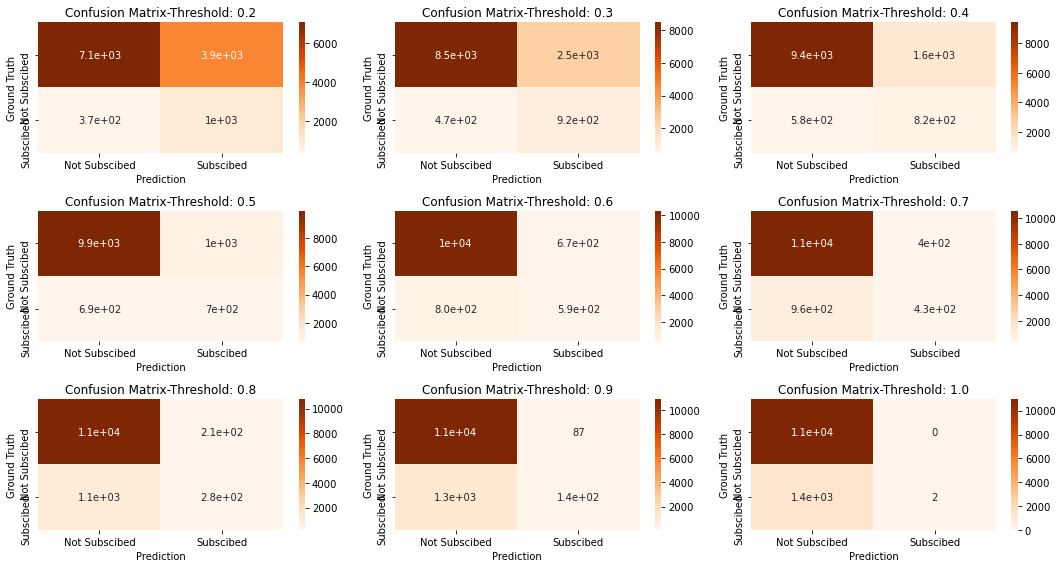

In [129]:
#Drawing Confusion matrix for different values of threshold
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
for a,ax in zip(range(20, 101, 10),axes.flatten()):
    predicted = (predicted_proba [:,1] >= a/100).astype('int')
    sns.heatmap(confusion_matrix(y_test, predicted), annot=True,ax=ax,cmap='Oranges')
    ax.set_title('Confusion Matrix-Threshold: ' + str(a/100))
    ax.set_xlabel('Prediction');ax.set_ylabel('Ground Truth');
    ax.xaxis.set_ticklabels(['Not Subscibed', 'Subscibed']); ax.yaxis.set_ticklabels(['Not Subscibed', 'Subscibed']);
plt.tight_layout()  
plt.show()

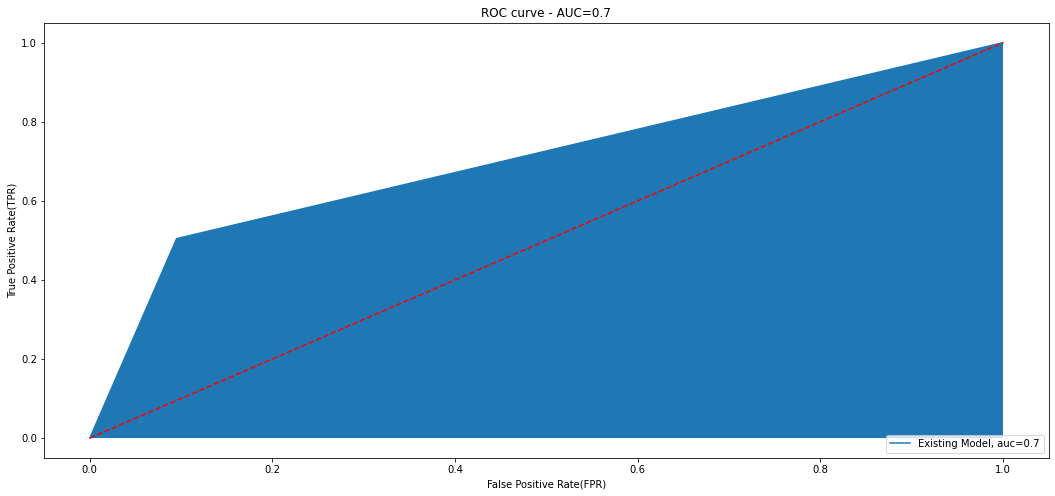

In [118]:
#Drawing ROC curve & finding the area under the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, randomforest_y_predict)
auc = metrics.roc_auc_score(y_test, randomforest_y_predict)
plt.plot(fpr,tpr,label="Existing Model, auc="+str(round(auc,2)));
plt.plot([0, 1], [0, 1],'r--')
plt.fill_between(fpr, tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title("ROC curve - AUC="+str(round(auc,2)))
plt.legend(loc=4);

__Inference:__
- Area under the curve for ROC increased to 0.7, let's look at the PR-AUC

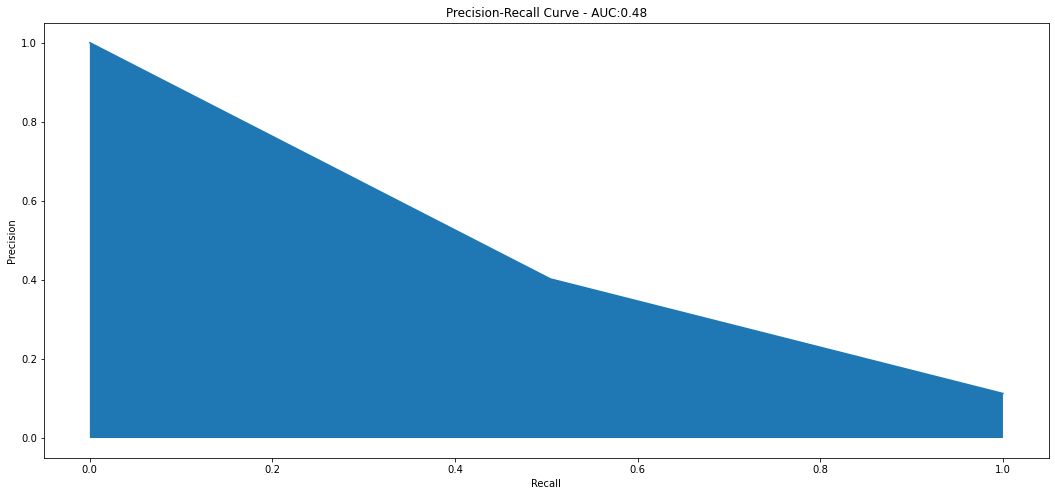

In [120]:
#PR AUC Curve
precision, recall, _ = precision_recall_curve(y_test, randomforest_y_predict)
auc_score = metrics.auc(recall,precision)
plt.plot(recall, precision)
plt.fill_between(recall, precision)
plt.title('Precision-Recall Curve - AUC:'+ str(round(auc_score,2)))
plt.xlabel('Recall')
plt.ylabel('Precision');

__Inference:__
- PR AUC score has increased from 0.07(Existing Model) to 0.48(Random forest with SMOTE)

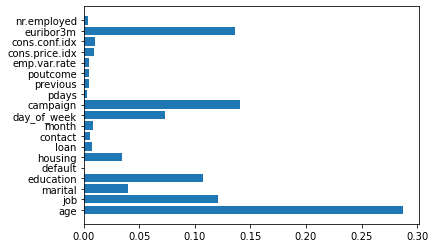

In [60]:
#Let's look at the feature importance of the attributes in the model
plt.barh(X_trainres.columns, randomforest.feature_importances_);

__Inference:__
- Key features according to this model are age, euribor3m,campaign.

# XG Boost with SMOTE

In [131]:
#Importing the required packages
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [132]:
# fit model
import warnings 
warnings.filterwarnings('ignore')#Ignoring warnings
model = XGBClassifier()
model.fit(X_trainres, y_trainres)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\nex3hiy\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [134]:
#Accuracy score for threshold=0.5
score = accuracy_score(y_test, y_pred)
score

0.8758598365299021

In [136]:
#Predicting classes with different threshold
threshold = 0.9
predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

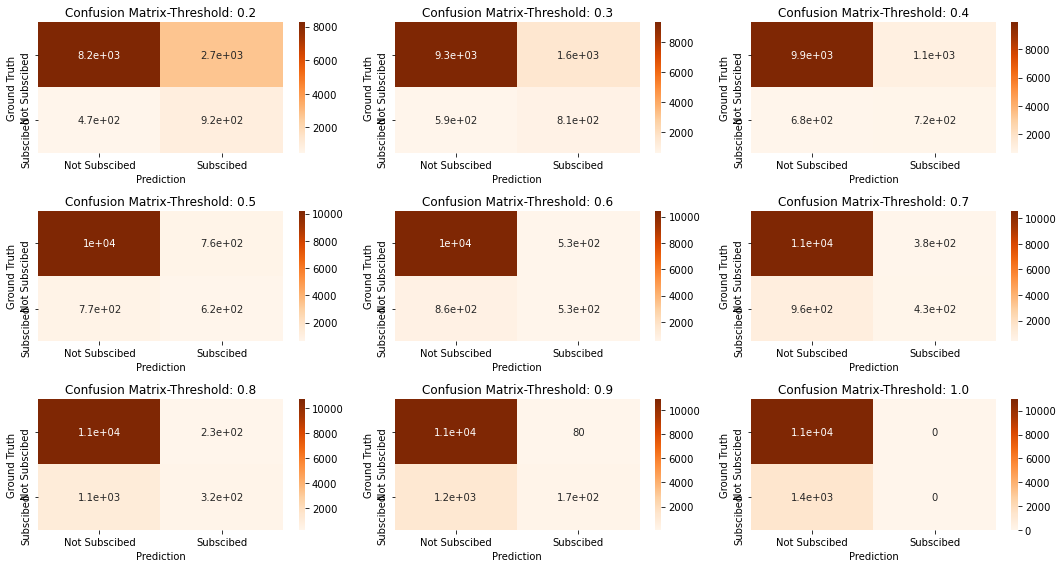

In [137]:
#Confusion matrix for different values of threshold
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
for a,ax in zip(range(20, 101, 10),axes.flatten()):
    predicted = (predicted_proba [:,1] >= a/100).astype('int')
    sns.heatmap(confusion_matrix(y_test, predicted), annot=True,ax=ax,cmap='Oranges')
    ax.set_title('Confusion Matrix-Threshold: ' + str(a/100))
    ax.set_xlabel('Prediction');ax.set_ylabel('Ground Truth');
    ax.xaxis.set_ticklabels(['Not Subscibed', 'Subscibed']); ax.yaxis.set_ticklabels(['Not Subscibed', 'Subscibed']);
plt.tight_layout()  
plt.show()

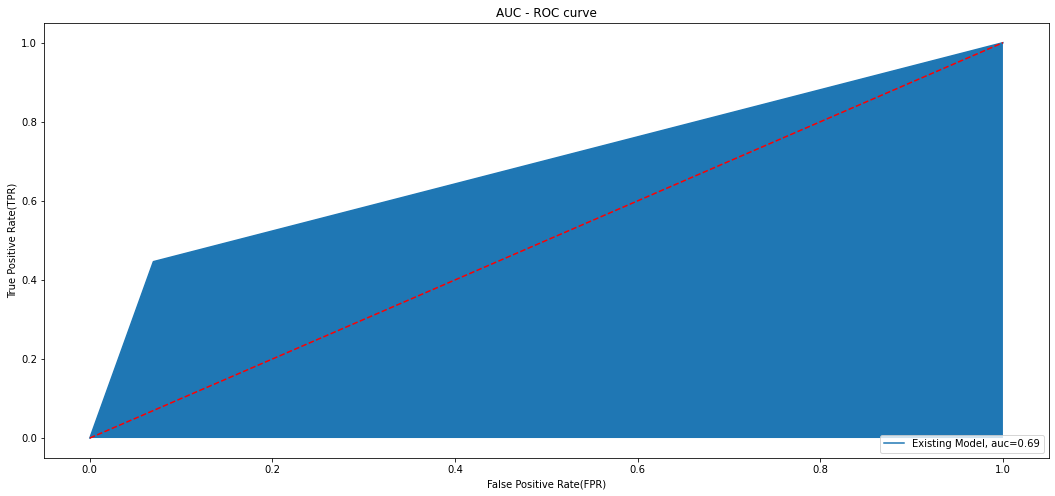

In [138]:
#AUC-ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="Existing Model, auc="+str(round(auc,2)));
plt.plot([0, 1], [0, 1],'r--')
plt.fill_between(fpr, tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('AUC - ROC curve')
plt.legend(loc=4);

__Inference:__
- AUC for ROC curve is 0.69

Precision-Recall score is: 0.26


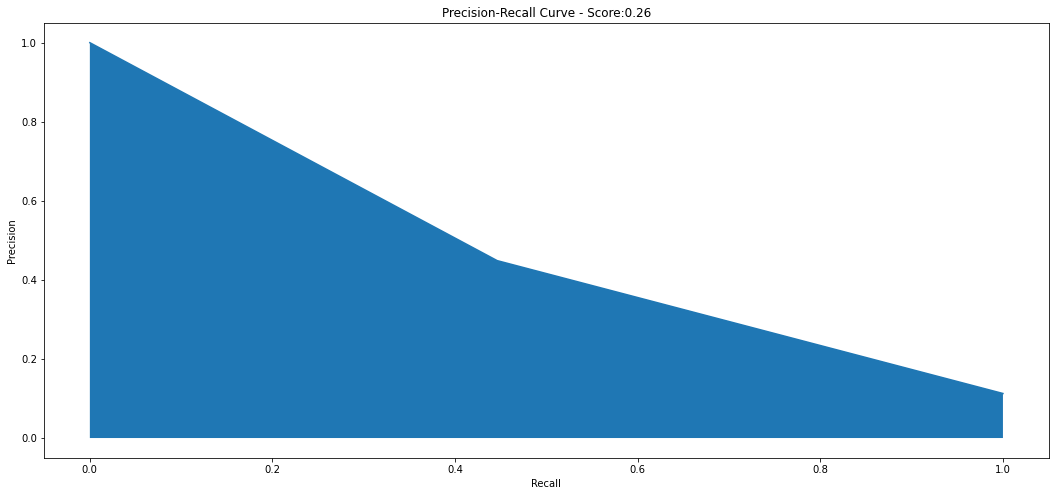

In [139]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
precision_recall_score = average_precision_score(y_test, predictions)
print('Precision-Recall score is:', round(precision_recall_score,2))
plt.plot(recall, precision)
plt.fill_between(recall, precision)
plt.title('Precision-Recall Curve - Score:'+ str(round(precision_recall_score,2)))
plt.xlabel('Recall')
plt.ylabel('Precision');

__Inference:__
- XG-Boost with SMOTE gave lesser AUC than Random Forest with SMOTE.

# Undersampling

Let's look at the random undersampling technique

In [ ]:
#Preparing data for model
#not used here
from sklearn.utils import resample
columns = ['job', 'marital', 'education', 'default','contact', 'housing', 'loan', 'poutcome', 'month', 'day_of_week','y']
campaign_data[columns]=oneHotEncoder(columns=columns, df=campaign_data)

In [154]:
#Splitting the data based on class
from sklearn.utils import resample
majority = campaign_data[campaign_data.y==0]
minority = campaign_data[campaign_data.y==1]
#resampling the data to balance our model
majority_downsampled = resample(majority,replace=False,n_samples=len(minority),random_state=1234)
# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])
downsampled.y.value_counts()

1    4640
0    4640
Name: y, dtype: int64

In [155]:
#Splitting Campaign data into 2 datatsets
target=downsampled.y
campaign_data=downsampled.drop(columns =['duration', 'y','ModelPrediction'])

In [156]:
#Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(campaign_data,target, test_size = 0.30,stratify=target, 
                                                    random_state=1234)

In [228]:
#Shape of X_test
X_test.shape

(2784, 19)

In [229]:
#Shape of X_train
X_train.shape

(6496, 19)

In [157]:
#Value counts for different classes in y_train
y_train.value_counts()

1    3248
0    3248
Name: y, dtype: int64

In [164]:
#Value counts for different classes in y_test
y_test.value_counts()

1    1392
0    1392
Name: y, dtype: int64

We can see that the data is perfectly balanced for both classes.

# Random Forest with Undersampling

In [165]:
#Initialising Random Forest Classifier
randomforest = RandomForestClassifier(max_features=5, class_weight=dict({1:2}),min_samples_split=10).fit(X_trainres, y_trainres)
randomforest_y_predict = randomforest.predict(X_test)
rf_score = accuracy_score(randomforest_y_predict, y_test)

In [166]:
#Accuracy score for 0.5 threshold
print('Accuracy score is:', round(rf_score,2))

Accuracy score is: 0.83


In [204]:
#Predicting classes with different threshold
threshold = 0.9
predicted_proba = randomforest.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [205]:
#Assuming threshold=0.98
print('Recall: '+ str(recall_score(y_test, predicted)))
print('Precision: '+ str(precision_score(y_test, predicted)))
print('F1 score: '+ str(f1_score(y_test, predicted)))
print('F2 score: ' + str(fbeta_score(y_test, predicted, average='macro', beta=2)))

Recall: 0.1939655172413793
Precision: 0.996309963099631
F1 score: 0.3247143716175587
F2 score: 0.5459323912944377


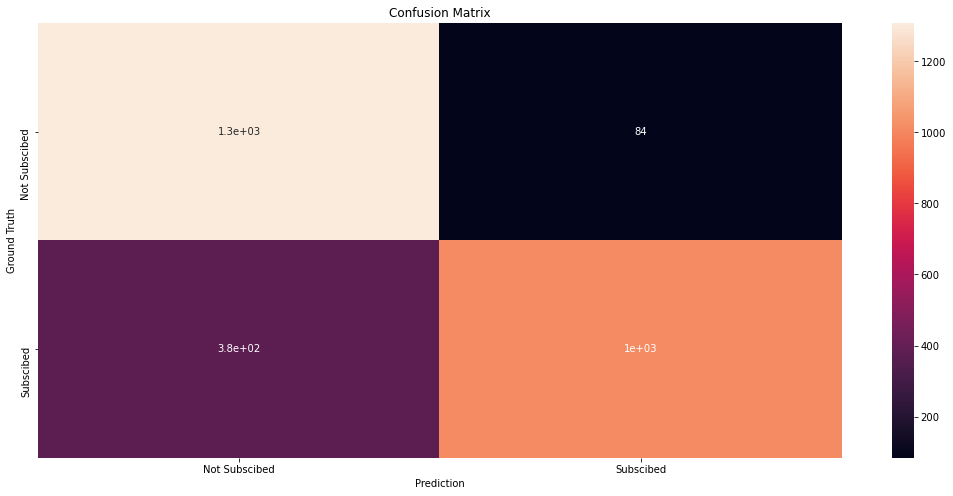

In [167]:
#Confusion matrix for threshold=0.5
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
cf_matrix = confusion_matrix(y_test, randomforest_y_predict)
sns.heatmap(cf_matrix, annot=True);
ax.set_xlabel('Prediction');ax.set_ylabel('Ground Truth'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Subscibed', 'Subscibed']); ax.yaxis.set_ticklabels(['Not Subscibed', 'Subscibed']);

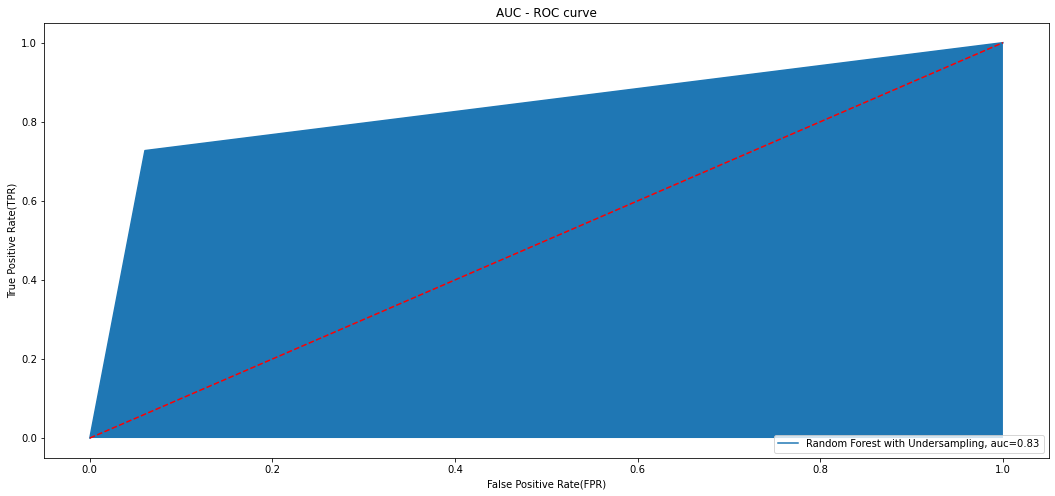

In [171]:
#Drawing ROC curve & calculating Area under the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, randomforest_y_predict)
auc = metrics.roc_auc_score(y_test, randomforest_y_predict)
plt.plot(fpr,tpr,label="Random Forest with Undersampling, auc="+str(round(auc,2)));
plt.plot([0, 1], [0, 1],'r--')
plt.fill_between(fpr, tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('AUC - ROC curve')
plt.legend(loc=4);

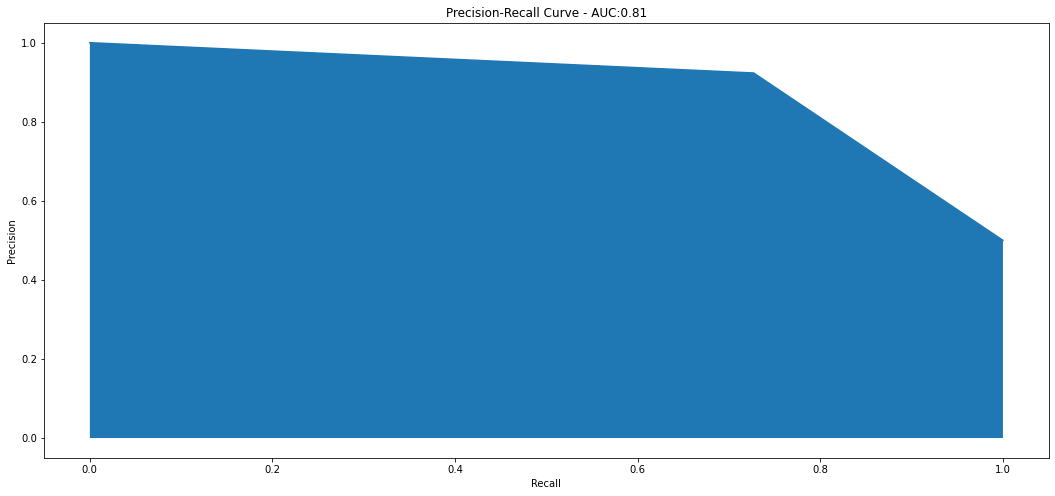

In [172]:
#Drawing precision recall curve & calculating PR score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test, randomforest_y_predict)
precision_recall_score = average_precision_score(y_test, randomforest_y_predict)
plt.plot(recall, precision)
plt.fill_between(recall, precision)
plt.title('Precision-Recall Curve - AUC:'+ str(round(precision_recall_score,2)))
plt.xlabel('Recall')
plt.ylabel('Precision');

__Inference:__
- AUC for both ROC Curve(0.83) & PR Curve(0.81) have increased highly for this model.

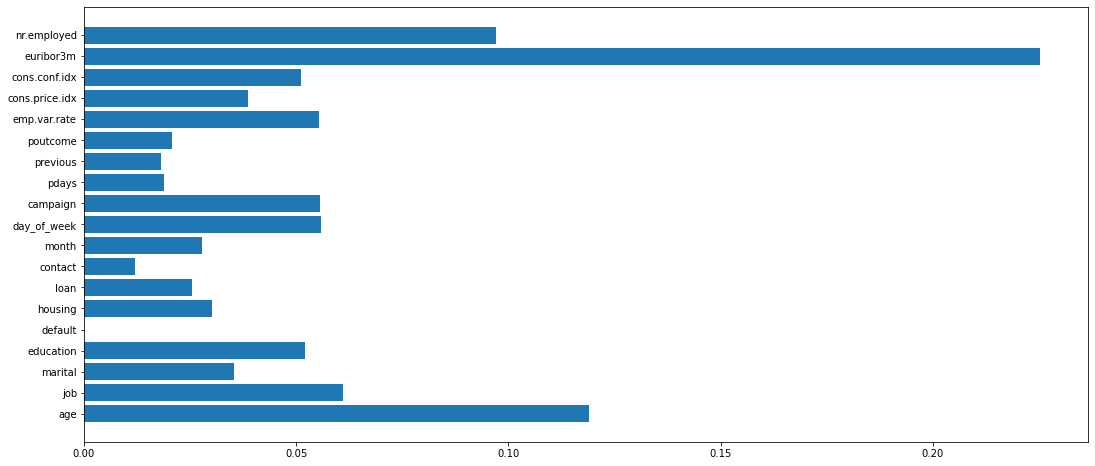

In [173]:
plt.barh(X_trainres.columns, randomforest.feature_importances_);

From the above feature importance graph we can see that, the most relevent features are the following:
- euribor3m
- nr.employed
- age
- emp.var.rate
- poutcome_success

# XG-Boost with Under Sampling

In [174]:
# fit model no training data
import warnings 
warnings.filterwarnings('ignore')#Ignoring warnings
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [333]:
#Assigning classes with threshold=0.5 using proba
y_pred = (model.predict_proba(X_test)[:,1] >= 0.5).astype(int)

In [175]:
#Accuracy score for threshold=0.5
score = accuracy_score(y_pred, y_test)
score

0.7234195402298851

In [177]:
#Let's change the threshold & see how it is impacting the model
threshold = 0.9

predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

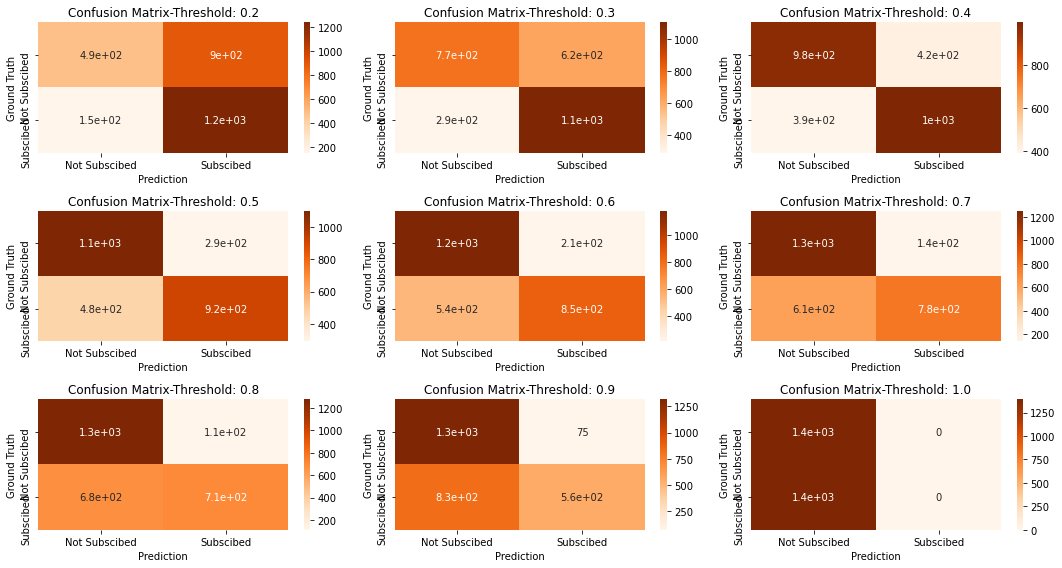

In [178]:
#Drawing the confusion matrix with different values of threshold
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
for a,ax in zip(range(20, 101, 10),axes.flatten()):
    predicted = (predicted_proba [:,1] >= a/100).astype('int')
    sns.heatmap(confusion_matrix(y_test, predicted), annot=True,ax=ax,cmap='Oranges')
    ax.set_title('Confusion Matrix-Threshold: ' + str(a/100))
    ax.set_xlabel('Prediction');ax.set_ylabel('Ground Truth');
    ax.xaxis.set_ticklabels(['Not Subscibed', 'Subscibed']); ax.yaxis.set_ticklabels(['Not Subscibed', 'Subscibed']);
plt.tight_layout()  
plt.show()

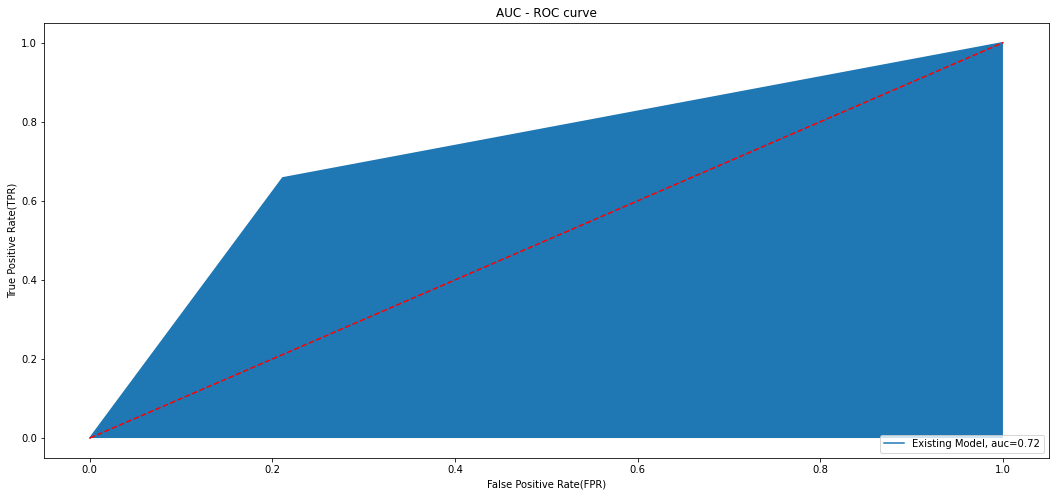

In [179]:
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Existing Model, auc="+str(round(auc,2)));
plt.plot([0, 1], [0, 1],'r--')
plt.fill_between(fpr, tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('AUC - ROC curve')
plt.legend(loc=4);

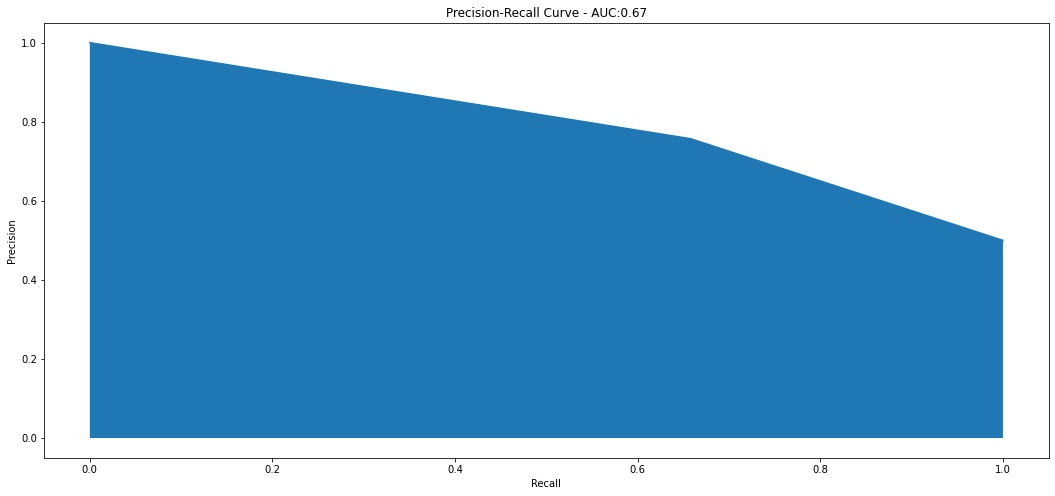

In [182]:
#Precision Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
precision_recall_score = average_precision_score(y_test, y_pred)
plt.plot(recall, precision)
plt.fill_between(recall, precision)
plt.title('Precision-Recall Curve - AUC:'+ str(round(precision_recall_score,2)))
plt.xlabel('Recall')
plt.ylabel('Precision');

__Inference:__
- PR score is 0.67 for XG-boost with Undersampling.

# Conclusions

Different techniques considered are:
   1. SMOTE
        - Random Forest(PR-AUC=0.48)
        - XG Boost(PR-AUC=0.81)
   2. Undersampling
        - Random Forest(PR-AUC=0.26)
        - XG Boost(PR-AUC=0.67)

__Random Forest__ with Undersampling is the winner model with a Precision Recall score of 0.81

## Feature Importance

Most influential variables are euribor3m, nr.employed, emp.var.rate,age
- __euribor3m:__ denotes the euribor 3 month rate. This indicator is based on the average bank interest rates. Higher the interest rate the more willingly customer willing to subscribe
- __nr.employed:__ Number of employees in the bank, has positive effect for turning people to subscribe the term deposit. This can be explained for size of the bank being a viable option for customers
- __emp.var.rate:__ Decrease of employment rate will reduce the chance of subscriptions
- __Age:__ Age is an important variable for subscription, as the people with age around 40 are more likely to subscribe
- Therefore, if banks want to improve their lead generation, what they should do is to hire more people to work for them, improve the quality of conversation on the phone and run their campaigns when interest rates are high and macroeconomic environment is stable. 

# Future Scope:

We can further deep-dive & make better the campaign better in a number of ways. Some of the points from the exhaustive list are: 
- More Data + Quality Data = Better Results. Eg: More Data on Customer behaviour while interacting with the brand
- Customer Segmentation, Personalized Marketing, A/B Testing
- Omni-Channel Marketing
- Advanced techniques like Neural Networks can be used to build the models.
- Grid Search & Cross Validation can be applied to find the optimal thresholds
- Seasonality of the data can be considered
- Combination of oversampling & undersampling can be explored